In [1]:
import pandas as pd
import numpy as np
import cartopy.crs as ccrs 
import cartopy.feature as cfeat
import matplotlib.pyplot as plt
import xarray as xr
import os
import metpy.constants as mpconst
from metpy.units import units 

In [2]:
os.chdir("/home/mohamed/EHTPIII/CLIMATOLOGIE/CODE/")

In [3]:
infile="/home/mohamed/EHTPIII/CLIMATOLOGIE/DATA/windstress_data/WIND_STRESS_MOROCCO_3.nc"
DATA=xr.open_dataset(infile)

In [4]:
DATA.variables

Frozen({'time_counter': <xarray.IndexVariable 'time_counter' (time_counter: 684)> Size: 5kB
array(['1958-01-16T00:00:00.000000000', '1958-02-15T00:00:00.000000000',
       '1958-03-16T00:00:00.000000000', ..., '2014-10-16T00:00:00.000000000',
       '2014-11-16T00:00:00.000000000', '2014-12-16T00:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    standard_name:  time
    axis:           T, 'nav_lon': <xarray.Variable (y: 88, x: 88)> Size: 31kB
[7744 values with dtype=float32]
Attributes:
    standard_name:        longitude
    long_name:            Longitude
    units:                degrees_east
    _CoordinateAxisType:  Lon, 'nav_lat': <xarray.Variable (y: 88, x: 88)> Size: 31kB
[7744 values with dtype=float32]
Attributes:
    standard_name:        latitude
    long_name:            Latitude
    units:                degrees_north
    _CoordinateAxisType:  Lat, 'nav_lon_2': <xarray.Variable (y: 88, x_2: 89)> Size: 31kB
[7832 values with dtype=float32]
Attributes:
    st

In [5]:
ZWS=DATA.sozotaux # zonal (over latitude)
SWS=DATA.sometauy # meridional (over longitude)
LON=DATA.nav_lon # degree
LAT=DATA.nav_lat # degree
TIME=DATA.time_counter

In [8]:
SWS_2=SWS.interp(x_2=ZWS['x'],method='nearest') # reshape the meridional wind stress to have the same shape as zonal wind stress

Text(0.5, 1.0, 'ZONAL WIND STRESS at 1958-01-16T00:00:00.000000000')

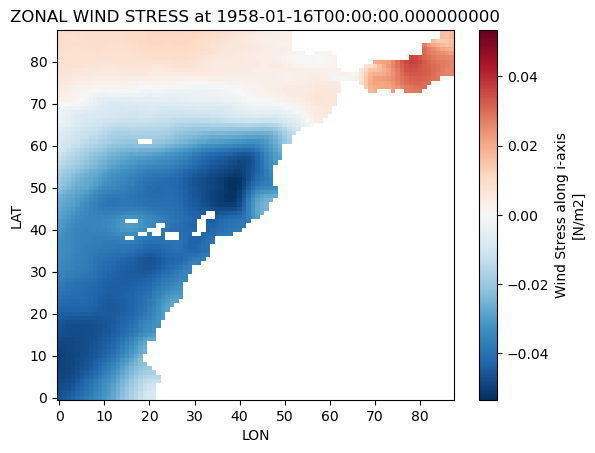

In [11]:
# ZWS.isel(time_counter=0).plot.contourf()
# ZWS.isel(time_counter=0).plot.contour()
time_value = TIME.isel(time_counter=0).values 
ZWS.isel(time_counter=0).plot()
plt.xlabel("LON")
plt.ylabel("LAT")
plt.title(f"ZONAL WIND STRESS at {time_value.astype(str)}")

In [12]:
omega=mpconst.omega
Rho_A=mpconst.dry_air_density_stp
Rho_W=mpconst.rho_l

In [99]:
f=2*omega*np.sin(LAT)
Fi=[0.8753019,0.6205065,1.029891]*units.rad # the angle between Moroccan Coeastline and the Equator
Cd=1.3*10**(-3)
fi=Fi.mean()

In [100]:
num_repeats=SWS.shape[0]
f_2=np.stack([f]*num_repeats,axis=-1).transpose((2,0,1))

In [101]:
f_stacked = np.stack([f] * 684, axis=0)
f_stacked.shape

(684, 88, 88)

In [115]:
TOx=  SWS_2
TOy= ZWS
Qx=TOy/(Rho_W*f_stacked) # ekman transport 
Qy=-TOx/(Rho_W*f_stacked)

Text(0.5, 1.0, 'EKMAN TRANSPORT')

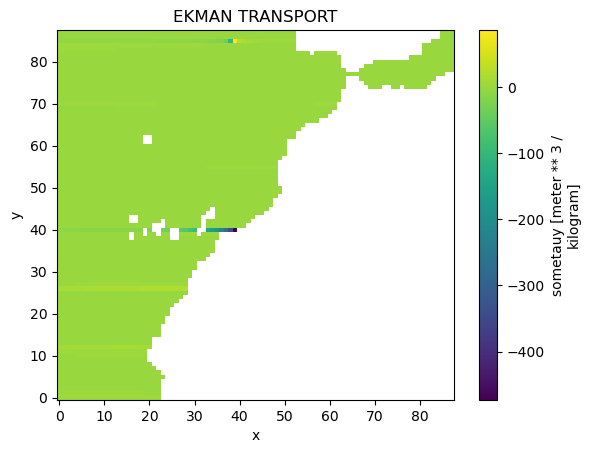

In [133]:
Qy[2,:,:].plot(vmin=np.min(Qy[2,:,:]).values, vmax=np.max(Qy[2,:,:]).values, cmap='viridis')
plt.title("EKMAN TRANSPORT")

In [140]:
Qx

Magnitude,[[[-1.1269572973251343 -1.106149673461914 -1.080511450767517 ... nan nan nan] [-0.6471691727638245 -0.6374252438545227 -0.6251603364944458 ... nan nan nan] [-0.4750368595123291 -0.46966731548309326 -0.46250614523887634 ... nan nan nan] ... [0.8931646943092346 0.8697981238365173 0.8595702052116394 ... -0.5874025821685791 -0.5788994431495667 -0.6060327887535095] [0.23795607686042786 0.22951702773571014 0.22463037073612213 ... 4.3124165534973145 5.165715217590332 7.056850433349609] [0.14839449524879456 0.14488177001476288 0.14295153319835663 ... 0.49289026856422424 0.5100322961807251 0.5481356978416443]] [[-0.582862913608551 -0.5693756937980652 -0.5533149242401123 ... nan nan nan] [-0.33145400881767273 -0.3252481520175934 -0.31709375977516174 ... nan nan nan] [-0.24283625185489655 -0.23901315033435822 -0.23383329808712006 ... nan nan nan] ... [4.3986382484436035 4.317934989929199 4.257349014282227 ... -0.351139634847641 -0.3502359390258789 -0.3874485194683075] [1.1600749492645264 1.1292344331741333 1.1035789251327515 ... 2.96742582321167 3.617440938949585 4.903367042541504] [0.6877550482749939 0.671876847743988 0.6584564447402954 ... 0.38392046093940735 0.3983229100704193 0.431242972612381]] [[-1.1119962930679321 -1.0883941650390625 -1.0637682676315308 ... nan nan nan] [-0.640056312084198 -0.628095805644989 -0.6149032115936279 ... nan nan nan] [-0.4739958941936493 -0.4654254913330078 -0.45564132928848267 ... nan nan nan] ... [8.30752182006836 8.39554500579834 8.519043922424316 ... -1.721084475517273 -1.6757296323776245 -1.6693115234375] [2.1983113288879395 2.208484172821045 2.22389817237854 ... 10.756986618041992 13.021284103393555 17.055225372314453] [1.29652738571167 1.3070822954177856 1.317994475364685 ... 1.1974164247512817 1.2261919975280762 1.292108416557312]] ... [[-0.8441964983940125 -0.8297856450080872 -0.8160524964332581 ... nan nan nan] [-0.48654478788375854 -0.47606778144836426 -0.4674464166164398 ... nan nan nan] [-0.3576551079750061 -0.349971741437912 -0.3457719683647156 ... nan nan nan] ... [1.21322500705719 1.4379923343658447 1.6379625797271729 ... 0.12482749670743942 0.1383017599582672 0.13843891024589539] [0.44148293137550354 0.4508395195007324 0.46980416774749756 ... -0.6024295091629028 -0.7707033157348633 -1.056171178817749] [0.31075435876846313 0.3016437292098999 0.33190783858299255 ... -0.052043501287698746 -0.026368428021669388 -0.008326290175318718]] [[-1.2574950456619263 -1.2219350337982178 -1.1827768087387085 ... nan nan nan] [-0.7148692607879639 -0.691431999206543 -0.6674593687057495 ... nan nan nan] [-0.5205636620521545 -0.5029640793800354 -0.4860053062438965 ... nan nan nan] ... [8.636821746826172 8.873711585998535 8.981624603271484 ... -1.3062976598739624 -1.3532549142837524 -1.4245887994766235] [2.3984487056732178 2.3984572887420654 2.402003049850464 ... 7.957367420196533 9.737521171569824 13.376358032226562] [1.4552911520004272 1.4385030269622803 1.45510733127594 ... 0.9170458316802979 0.9266610741615295 0.9547164440155029]] [[-2.4613704681396484 -2.4491891860961914 -2.43638277053833 ... nan nan nan] [-1.397356390953064 -1.3890262842178345 -1.3795322179794312 ... nan nan nan] [-1.0186549425125122 -1.0102518796920776 -1.000211238861084 ... nan nan nan] ... [-4.192783355712891 -4.104849338531494 -4.10753870010376 ... -0.7308827042579651 -0.7325343489646912 -0.8010381460189819] [-1.0126173496246338 -1.011473536491394 -1.0024677515029907 ... 4.391777992248535 5.305552005767822 7.415688514709473] [-0.5570977926254272 -0.5643096566200256 -0.5434600710868835 ... 0.5357064008712769 0.5789117217063904 0.6118062138557434]]]
Units,meter3/kilogram


In [117]:
UI=-(np.sin(fi-np.pi/2)*Qx+np.cos(fi-np.pi/2)*Qy) # THE UPWELLING INDEX

In [118]:
UI.shape

(684, 88, 88)

In [125]:
np.max(UI).values

array(1100.7954, dtype=float32)

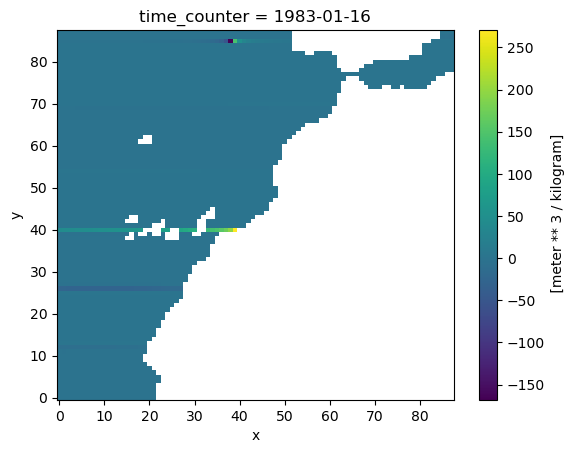

In [138]:
MAP=UI[300,:,:]
MAP.plot(vmin=np.min(MAP).values, vmax=np.max(MAP).values, cmap='viridis')